### Import Necessary Packages

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Scrape WikiLeaf for Type, THC, & CBD contents for Strains

In [2]:
# Create lists for scraped values from WikiLeaf

names,types,contents = [], [], []

for p in range(1,63):
    response = requests.get('https://www.wikileaf.com/strains/?page={}'.format(p))
    soup = BeautifulSoup(response.content,'html.parser')
    name = soup.findAll('h5',{'class':'name disp-title'})
    content = soup.findAll('p',{'class':'desc'})
    typ = soup.findAll('p',{'class':'tag'})
    

    for n,c,t in zip(name,contents,typ):
            names.append(n.text)
            # Retrieve only the text associated to the THC (& CBD) content
            contents.append(c.text[4:])
            types.append(t.text)

### Data Cleaning

In [246]:
# Create a DataFrame from the scraped information
info = {'name':names,'type':types,'conts':contents}
df = pd.DataFrame(info)

# Split the THC content column to create a CBD content column
df[['thc','cbd']] = df.conts.str.split('%',expand=True)
df = df.fillna(0)

df.tail()

,name,type,conts,thc,cbd
1971,Rose Bud,Indica,14,14,0
1972,Rozé,Hybrid,0,0,0
1973,Russian Doll,Sativa,25,25,0
1974,Santa Sativa,Sativa,21,21,0
1975,Scout's Honor,Indica,32,32,0


In [247]:
def helps(x):
    if x != 0:
        return x.split()[-1]
    else:
        return x

In [248]:
df = df.drop(columns=['conts'])
df['cbd'] = df['cbd'].apply(lambda x: helps(x))

In [249]:
# Clean rows with CBD content still in THC column
df.loc[df['thc'].str.contains('%'), 'thc'] = df['thc'].str[:-1]

In [250]:
# Convert values to int64

df['thc'] = pd.to_numeric(df['thc'])
df['cbd'] = pd.to_numeric(df['cbd'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 4 columns):
name    1976 non-null object
type    1976 non-null object
thc     1976 non-null int64
cbd     1976 non-null int64
dtypes: int64(2), object(2)
memory usage: 61.8+ KB


In [251]:
df = df.sort_values(by='thc')
df.tail()

,name,type,thc,cbd
189,Querkle,Indica,35,0
712,Skunkberry,Hybrid,40,0
811,Jack's Girl,Hybrid,54,0
589,Sour Moonrocks,Sativa,59,0
1364,Little Devil,Indica,60,0


In [252]:
df.reset_index(inplace=True)
df = df.drop(columns=['index'])
df.head()

,name,type,thc,cbd
0,SeattleSoda,Hybrid,0,0
1,Four Cups,Indica,0,0
2,Swiss,Indica,0,0
3,Alpha Omega OG,Sativa,0,0
4,Tahoe Hydro Champagne,Sativa,0,0


In [265]:
df.loc[58]

name    Remedy
type    Indica
thc          1
cbd         16
Name: 58, dtype: object

In [267]:
# Create a DataFrame that excludes THC values of 0
nozeros = df.loc[58:,]
nozeros.tail()

,name,type,thc,cbd
1971,Querkle,Indica,35,0
1972,Skunkberry,Hybrid,40,0
1973,Jack's Girl,Hybrid,54,0
1974,Sour Moonrocks,Sativa,59,0
1975,Little Devil,Indica,60,0


In [269]:
# Create a DataFrame of only THC values of 0
# Potentially match some strains with other datasets

allzeros = df.loc[:58,]
allzeros

,name,type,thc,cbd
0,SeattleSoda,Hybrid,0,0
1,Four Cups,Indica,0,0
2,Swiss,Indica,0,0
3,Alpha Omega OG,Sativa,0,0
4,Tahoe Hydro Champagne,Sativa,0,0
5,Blush,Hybrid,0,0
6,Blueberry Space Cake,Indica,0,0
7,Banana Bread,Hybrid,0,0
8,Humboldt Sour Diesel,Sativa,0,0
9,Apricot Jelly,Hybrid,0,0


### Visualizations

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

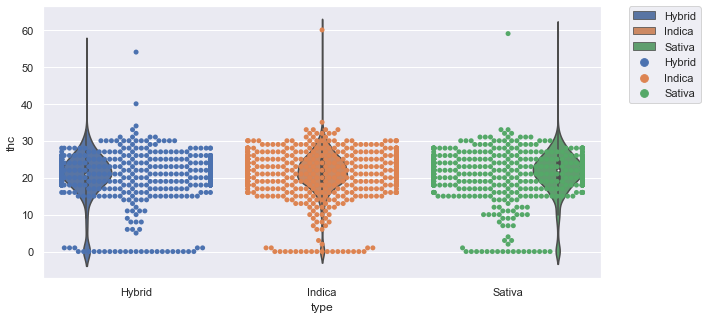

In [271]:
# Violin & Swarm plots including values of zero
g = sns.violinplot(x='type',y='thc',hue='type', data=df)
g = sns.swarmplot(x='type', y='thc', hue='type', data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

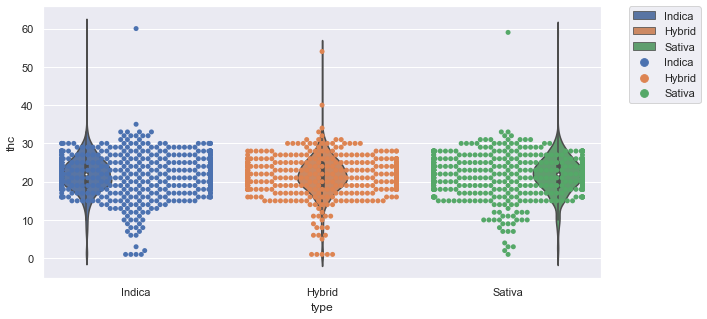

In [272]:
# Violin & Swarm plots excluding values of zero
h = sns.violinplot(x='type',y='thc',hue='type', data=nozeros)
h = sns.swarmplot(x='type', y='thc', hue='type', data=nozeros)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

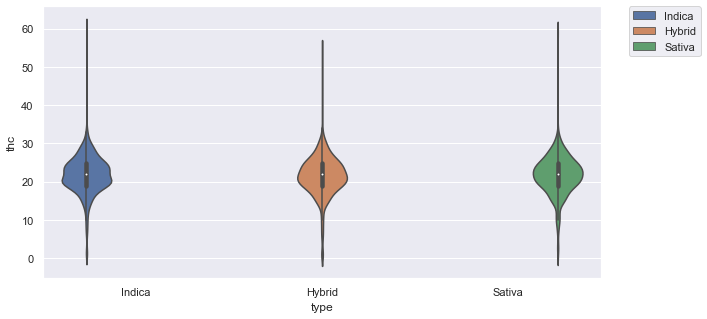

In [273]:
# Violin plot excluding values of zero

f = sns.violinplot(x='type',y='thc',hue='type', data=nozeros)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)